#DelayCat De-Essing Experimental Results

In this notebook, we will test DelayCat feature-parameter bindings by evaluating their efficacy through use as a means of de-essing a vocal sample. DelayCat de-esses its signal through mapping measures of noise (in this case, spectral flatness) to volume, where higher noise leads to lower volume.

Evaluation will be done by comparing measurements of DelayCat's de-essed signal with a commercial de-esser.

#Installs
Only necessary for some environments, such as binder.

In [35]:
# uncomment if necessary or set up your environment accordingly
#%pip install matplotlib
#%pip install scipy
#%pip install sklearn
#%pip install scikit-learn
#%pip install librosa

#Imports

In [36]:
%matplotlib inline
from pathlib import Path
import numpy, scipy, matplotlib.pyplot as plt, sklearn, urllib, IPython.display as ipd
import librosa, librosa.display
import urllib.request

#Load Files

In [37]:
control_fn = urllib.request.urlretrieve('https://drive.google.com/uc?export=download&id=1LIQAbsEDl1PCpyvPZ4c1fSzVyiBYKsZ1')[0]
control, control_sr = librosa.load(control_fn)
delaycat_fn = urllib.request.urlretrieve('https://drive.google.com/uc?export=download&id=1-Yxgp10WE1p_i2t-3HepdHuasvGLqMSM')[0]
delaycat, delaycat_sr = librosa.load(delaycat_fn)
izotope_fn = urllib.request.urlretrieve('https://drive.google.com/uc?export=download&id=15SqL9wX6zRni_FSL9A8oPBxNzPzqnFvz')[0]
izotope, izotope_sr = librosa.load(izotope_fn)

#assert(len(control) == len(delaycat) == len(izotope))
#assert(control_sr == delaycat_sr == izotope_sr)
sr = control_sr

##Control Audio

Uneffected audio sample.

In [38]:
display(ipd.Audio(control, rate=sr))

control noise (amp * flatness): 331.18587865747025
control total amp: 11684.945575379854
control noise ratio (total noise / total amp): 0.028342954318527416


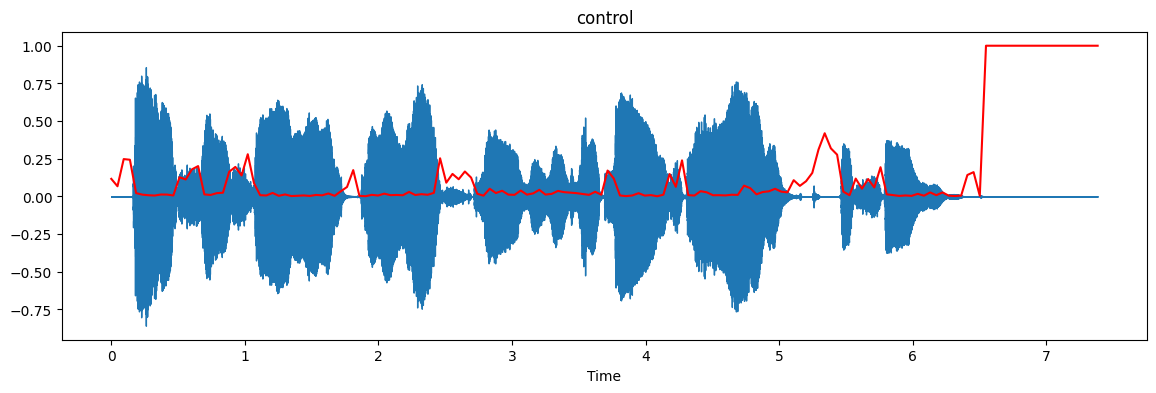

In [39]:
plt.figure(figsize=(14, 4))
plt.title('control')
librosa.display.waveshow(control, sr=sr)

control_flatness = numpy.array([librosa.feature.spectral_flatness(y=control[i: i + 1024], n_fft=1024)[0, 0] for i in range(0, len(control), 1024)])
t = librosa.frames_to_time(range(len(control_flatness))) * 2
plt.plot(t, control_flatness, color='r')

control_blocks = [control[i : i + 1024] for i in range(0, len(control), 1024)]
control_total_noise = 0
for i in range(len(control_blocks)):
  for s in control_blocks[i]:
    control_total_noise += abs(s) * control_flatness[i]
print('control noise (amp * flatness):', control_total_noise)
control_total_amp = sum(abs(control))
print('control total amp:', control_total_amp)
control_noise_ratio = control_total_noise / control_total_amp
print('control noise ratio (total noise / total amp):', control_noise_ratio)
#control_total_nonnoise = control_total_amp - control_total_noise
#print('control total non-noise:', control_total_nonnoise)

##Delay Cat Audio

DelayCat delayed signal with a parameter binding to make noisy / sibilant segments quieter.

This signal is a DELAYED signal, so it has been artificially shifted back here for comparisons sake.

This same process can be done with a delay time of 0 and shifting enabled, however the result is not as clean because of the innevitable offset of windowed analysis data. Those results will be demonstrated in this document as well (not included at the moment...).

In [40]:
display(ipd.Audio(delaycat, rate=sr))

Below is the plotted waveform, with the spectral flatness overlaid. The second waveform is drawn on top of the dry signal, where the red shows what part of the waveform has been removed.

delaycat noise (amp * flatness): 194.38671678911155
delaycat total amp: 10529.075911647775
delaycat noise ratio (total noise / total amp): 0.018461897171248572
delaycat noise reduction ratio (delaycat noise / control noise): 0.5869414407917931


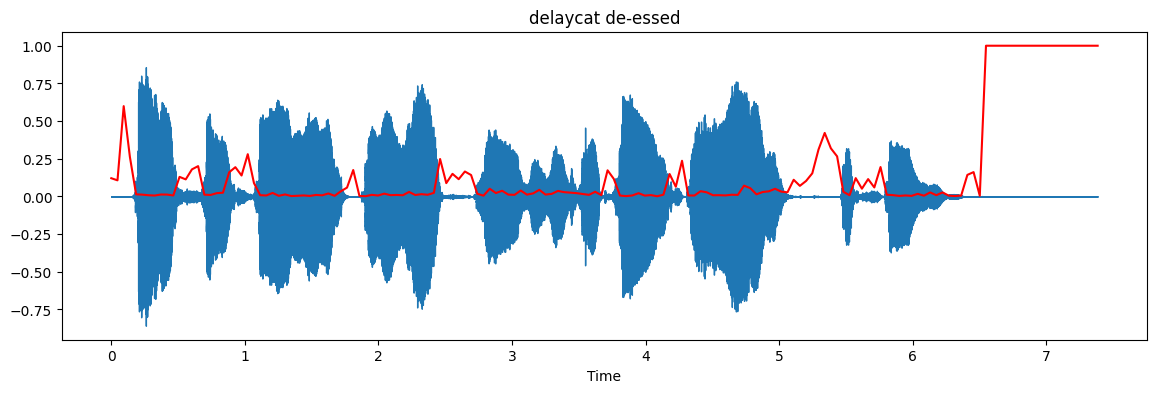

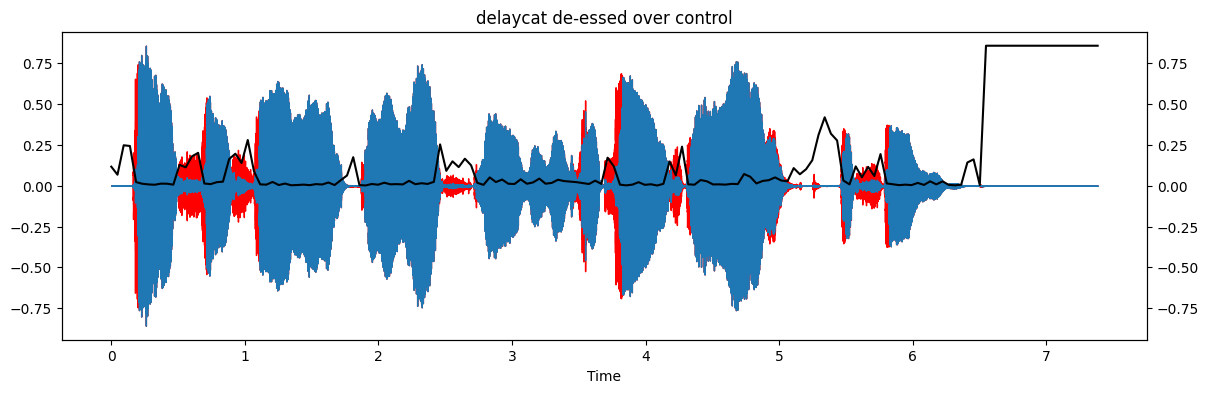

In [41]:
plt.figure(figsize=(14, 4))
plt.title('delaycat de-essed')
librosa.display.waveshow(delaycat, sr=sr)

delaycat_flatness = numpy.array([librosa.feature.spectral_flatness(y=delaycat[i: i + 1024], n_fft=1024)[0, 0] for i in range(0, len(delaycat), 1024)])
t = librosa.frames_to_time(range(len(delaycat_flatness))) * 2
plt.plot(t, delaycat_flatness, color='r')

delaycat_blocks = [delaycat[i : i + 1024] for i in range(0, len(delaycat), 1024)]
delaycat_total_noise = 0
for i in range(len(delaycat_blocks)):
  for s in delaycat_blocks[i]:
    delaycat_total_noise += abs(s) * delaycat_flatness[i]
print('delaycat noise (amp * flatness):', delaycat_total_noise)
delaycat_total_amp = sum(abs(delaycat))
print('delaycat total amp:', delaycat_total_amp)
delaycat_noise_ratio = delaycat_total_noise / delaycat_total_amp
print('delaycat noise ratio (total noise / total amp):', delaycat_noise_ratio)
delaycat_noise_reduction_ratio = delaycat_total_noise / control_total_noise
print('delaycat noise reduction ratio (delaycat noise / control noise):', delaycat_noise_reduction_ratio)
# don't think these non-noise algorithms really are completely accurate
#delaycat_nonnoise_remaining = delaycat_total_amp - delaycat_total_noise
#print('delaycat non-noise remaining:', delaycat_nonnoise_remaining)
#delaycat_nonnoise_removed = control_total_nonnoise - delaycat_nonnoise_remaining
#print('delaycat non-noise removed:', delaycat_nonnoise_removed)
#delaycat_nonnoise_lost_ratio = delaycat_nonnoise_removed / control_total_nonnoise
#print('delaycat non-noise lost ratio:', delaycat_nonnoise_lost_ratio)

fig = plt.figure(figsize=(14, 4)) #This setups the figure
ax1 = fig.subplots() #Creates the Axes object to display one of the plots
ax2 = ax1.twinx() #Creates a second Axes object that shares the x-axis

plt.title('delaycat de-essed over control')
librosa.display.waveshow(control, sr=sr, ax=ax1, color='r')
librosa.display.waveshow(delaycat, sr=sr, ax=ax2)
max_sample = numpy.max(control) # we just limit the spectral flatness on the plot so everything remains lined up properly
plt.plot(t, [min(max_sample, x) for x in control_flatness], color='black')
plt.show()

##Izotope Audio

Commercial De-Esser that analyzes vocals ahead of time and then de-esses using filtering techniques.

In [42]:
ipd.Audio(izotope, rate=sr)

Below is the plotted waveform, with the spectral flatness overlaid. The second waveform is drawn on top of the dry signal, where the red shows what part of the waveform has been removed.

izotope noise (amp * flatness): 259.98320256408925
izotope total amp: 11178.032749363589
izotope noise ratio (total noise / total amp): 0.023258404085360295
izotope noise reduction ratio (izotope noise / control noise): 0.7850069079575023


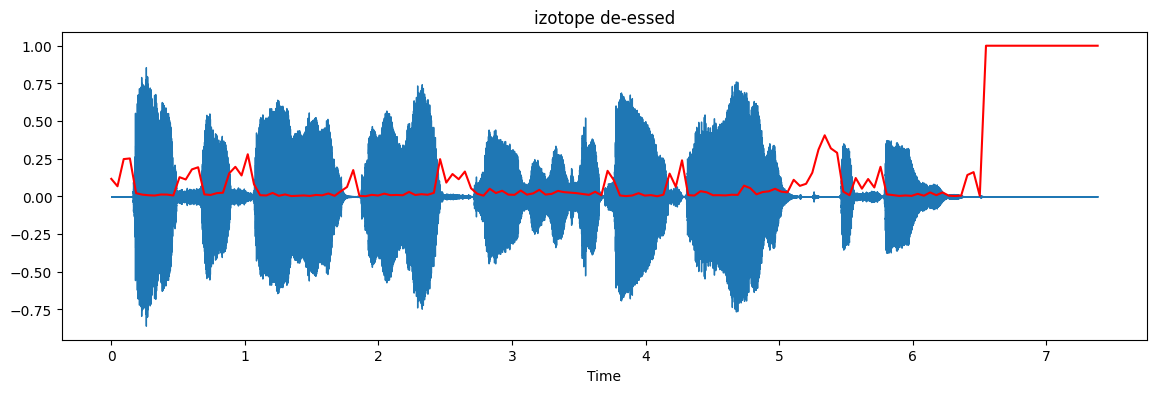

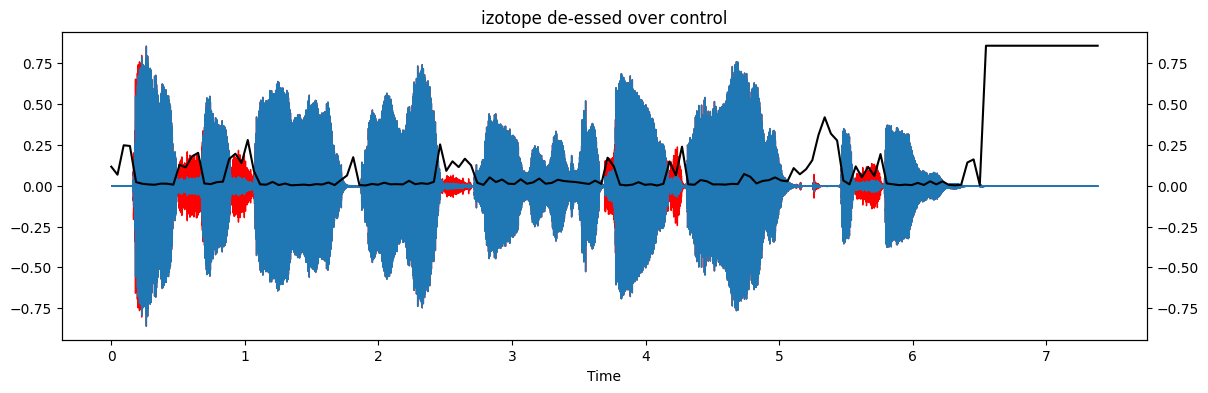

In [43]:
plt.figure(figsize=(14, 4))
plt.title('izotope de-essed')
librosa.display.waveshow(izotope, sr=sr)

izotope_flatness = numpy.array([librosa.feature.spectral_flatness(y=izotope[i: i + 1024], n_fft=1024)[0, 0] for i in range(0, len(izotope), 1024)])
t = librosa.frames_to_time(range(len(izotope_flatness))) * 2
plt.plot(t, izotope_flatness, color='r')

izotope_blocks = [izotope[i : i + 1024] for i in range(0, len(izotope), 1024)]
izotope_total_noise = 0
for i in range(len(izotope_blocks)):
  for s in izotope_blocks[i]:
    izotope_total_noise += abs(s) * izotope_flatness[i]
print('izotope noise (amp * flatness):', izotope_total_noise)
izotope_total_amp = sum(abs(izotope))
print('izotope total amp:', izotope_total_amp)
izotope_noise_ratio = izotope_total_noise / izotope_total_amp
print('izotope noise ratio (total noise / total amp):', izotope_noise_ratio)
izotope_noise_reduction_ratio = izotope_total_noise / control_total_noise
print('izotope noise reduction ratio (izotope noise / control noise):', izotope_noise_reduction_ratio)
# don't think these non-noise algorithms really are completely accurate
#izotope_nonnoise_remaining = izotope_total_amp - izotope_total_noise
#print('izotope non-noise remaining:', izotope_nonnoise_remaining)
#izotope_nonnoise_removed = control_total_nonnoise - izotope_nonnoise_remaining
#print('izotope non-noise removed:', izotope_nonnoise_removed)
#izotope_nonnoise_lost_ratio = izotope_nonnoise_removed / control_total_nonnoise
#print('izotope non-noise lost ratio:', izotope_nonnoise_lost_ratio)

fig = plt.figure(figsize=(14, 4)) #This setups the figure
ax1 = fig.subplots() #Creates the Axes object to display one of the plots
ax2 = ax1.twinx() #Creates a second Axes object that shares the x-axis

plt.title('izotope de-essed over control')
librosa.display.waveshow(control, sr=sr, ax=ax1, color='r')
librosa.display.waveshow(izotope, sr=sr, ax=ax2)
max_sample = numpy.max(control) # we just limit the spectral flatness on the plot so everything remains lined up properly
plt.plot(t, [min(max_sample, x) for x in control_flatness], color='black')
plt.show()

Below are plotted bar graphs of the total remaining noise and remaining noise ratios.



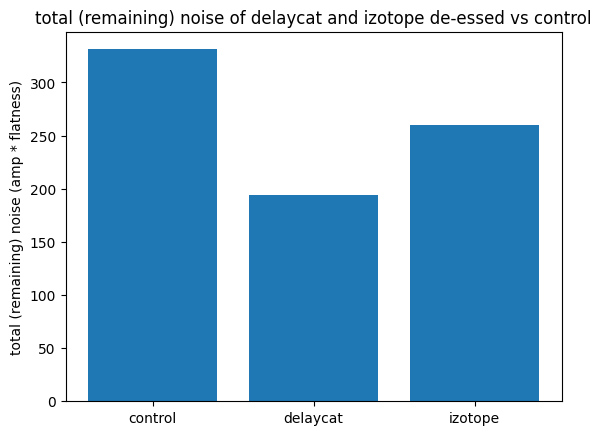

In [44]:
data = {'control' : control_total_noise, 'delaycat' : delaycat_total_noise, 'izotope' : izotope_total_noise}
plt.bar(data.keys(), data.values())
plt.ylabel('total (remaining) noise (amp * flatness)')
plt.title('total (remaining) noise of delaycat and izotope de-essed vs control')
plt.show()

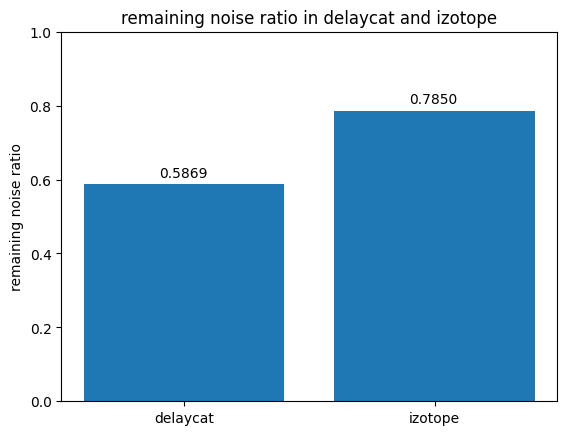

In [45]:
data = {'delaycat' : delaycat_noise_reduction_ratio, 'izotope' : izotope_noise_reduction_ratio}
plt.bar(data.keys(), data.values())
plt.ylim([0.0, 1.0])
for index, value in enumerate(data.values()):
    plt.text(index - 0.1, value + 0.02, '{0:.4f}'.format(value))
plt.ylabel('remaining noise ratio')
plt.title('remaining noise ratio in delaycat and izotope')
plt.show()

#Waveform Differences

The computed differences between the dry waveform and the de-essed waveforms are below so you can hear and see what is being removed from the original signal.

The DelayCat de-essed signal and the Izotope de-essed signal are also differenced to compare the qualities of the different methods.

##DelayCat / Control Difference

delaycat_diff noise (amp * flatness): 148.29197597706045
delaycat_diff total amp: 1155.8954400807665
delaycat_diff noise ratio (total noise / total amp): 0.12829186000309747
delaycat_diff noise reduced ratio (delaycat_diff noise / control noise): 0.4477605644847912


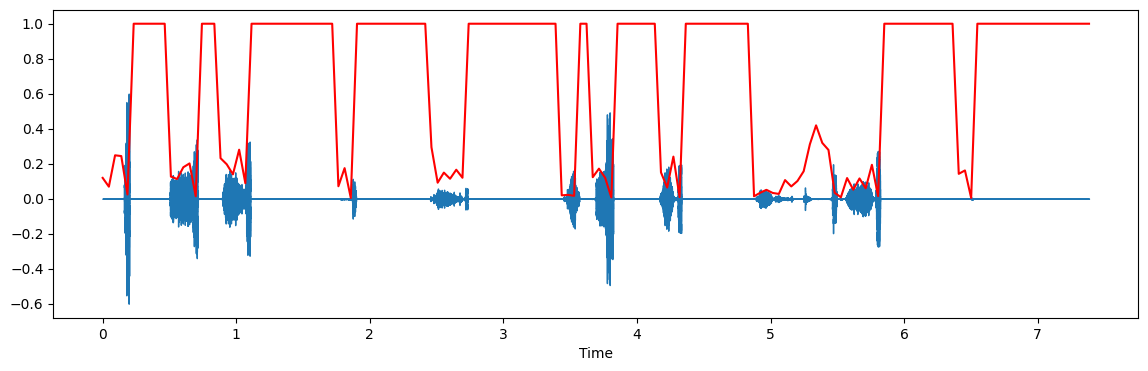

In [46]:
delaycat_diff = numpy.asarray([control[i] - delaycat[i] for i in range(len(control))])
display(ipd.Audio(delaycat_diff, rate=sr))

plt.figure(figsize=(14, 4))
librosa.display.waveshow(delaycat_diff, sr=sr)

delaycat_diff_flatness = numpy.array([librosa.feature.spectral_flatness(y=delaycat_diff[i: i + 1024], n_fft=1024)[0, 0] for i in range(0, len(delaycat_diff), 1024)])
t = librosa.frames_to_time(range(len(delaycat_diff_flatness))) * 2
plt.plot(t, delaycat_diff_flatness, color='r')

delaycat_diff_blocks = [delaycat_diff[i : i + 1024] for i in range(0, len(delaycat_diff), 1024)]
delaycat_diff_total_noise = 0
for i in range(len(delaycat_diff_blocks)):
  for s in delaycat_diff_blocks[i]:
    delaycat_diff_total_noise += abs(s) * delaycat_diff_flatness[i]
print('delaycat_diff noise (amp * flatness):', delaycat_diff_total_noise)
delaycat_diff_total_amp = sum(abs(delaycat_diff))
print('delaycat_diff total amp:', delaycat_diff_total_amp)
delaycat_diff_noise_ratio = delaycat_diff_total_noise / delaycat_diff_total_amp
print('delaycat_diff noise ratio (total noise / total amp):', delaycat_diff_noise_ratio)
delaycat_diff_noise_reduction_ratio = delaycat_diff_total_noise / control_total_noise
print('delaycat_diff noise reduced ratio (delaycat_diff noise / control noise):', delaycat_diff_noise_reduction_ratio)

##Izotope / Control Difference

izotope_diff noise (amp * flatness): 77.93020435870629
izotope_diff total amp: 506.91918260869534
izotope_diff noise ratio (total noise / total amp): 0.15373299538136187
izotope_diff noise reduced ratio (izotope_diff noise / control noise): 0.23530654348733807


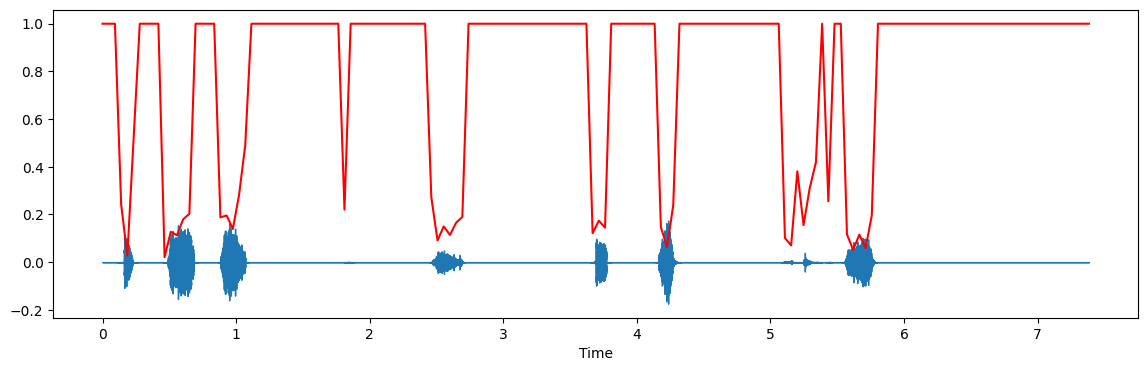

In [47]:
izotope_diff = numpy.asarray([control[i] - izotope[i] for i in range(len(control))])
display(ipd.Audio(izotope_diff, rate=sr))

plt.figure(figsize=(14, 4))
librosa.display.waveshow(izotope_diff, sr=sr)

izotope_diff_flatness = numpy.array([librosa.feature.spectral_flatness(y=izotope_diff[i: i + 1024], n_fft=1024)[0, 0] for i in range(0, len(izotope_diff), 1024)])
t = librosa.frames_to_time(range(len(izotope_diff_flatness))) * 2
plt.plot(t, izotope_diff_flatness, color='r')

izotope_diff_blocks = [izotope_diff[i : i + 1024] for i in range(0, len(izotope_diff), 1024)]
izotope_diff_total_noise = 0
for i in range(len(izotope_diff_blocks)):
  for s in izotope_diff_blocks[i]:
    izotope_diff_total_noise += abs(s) * izotope_diff_flatness[i]
print('izotope_diff noise (amp * flatness):', izotope_diff_total_noise)
izotope_diff_total_amp = sum(abs(izotope_diff))
print('izotope_diff total amp:', izotope_diff_total_amp)
izotope_diff_noise_ratio = izotope_diff_total_noise / izotope_diff_total_amp
print('izotope_diff noise ratio (total noise / total amp):',  izotope_diff_noise_ratio)
izotope_diff_noise_reduction_ratio = izotope_diff_total_noise / control_total_noise
print('izotope_diff noise reduced ratio (izotope_diff noise / control noise):', izotope_diff_noise_reduction_ratio)

Listening to the difference (removed) waveforms, we can hear that they are similar in their removal of sibilance, however there is some difference between then, with DelayCat having a harsher attack that seems to catch a bit more of the surrounding audio.

Below are plotted bar graphs of the total removed noise and removed noise ratios.



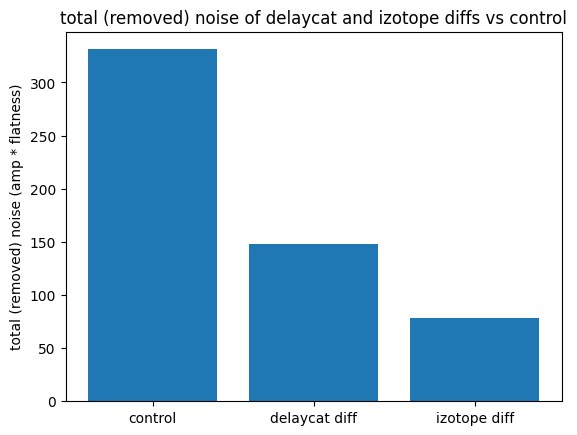

Note: the control noise shown here is the total noise in the dry signal, for comparisons sake


In [48]:
data = {'control' : control_total_noise, 'delaycat diff' : delaycat_diff_total_noise, 'izotope diff' : izotope_diff_total_noise}
plt.bar(data.keys(), data.values())
plt.ylabel('total (removed) noise (amp * flatness)')
plt.title('total (removed) noise of delaycat and izotope diffs vs control')
plt.show()
print('Note: the control noise shown here is the total noise in the dry signal, for comparisons sake')

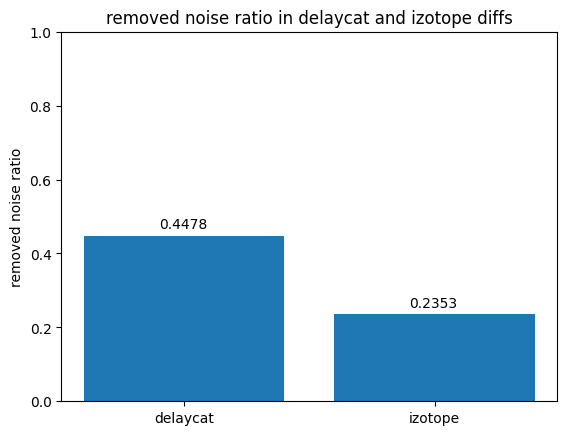

In [49]:
data = {'delaycat' : delaycat_diff_noise_reduction_ratio, 'izotope' : izotope_diff_noise_reduction_ratio}
plt.bar(data.keys(), data.values())
plt.ylim([0.0, 1.0])
for index, value in enumerate(data.values()):
    plt.text(index - 0.1, value + 0.02, '{0:.4f}'.format(value))
plt.ylabel('removed noise ratio')
plt.title('removed noise ratio in delaycat and izotope diffs')
plt.show()

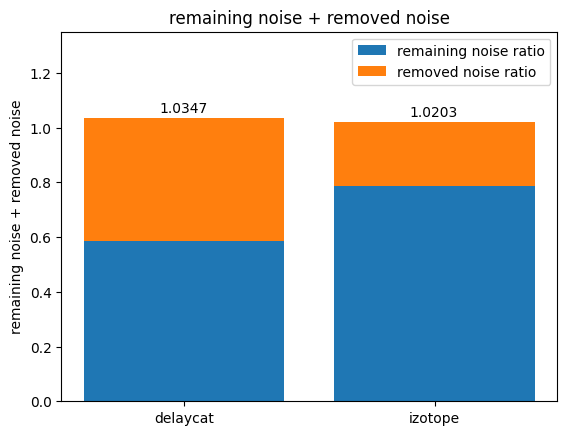

In [54]:
data0 = {'delaycat' : delaycat_noise_reduction_ratio, 'izotope' : izotope_noise_reduction_ratio}
data1 = {'delaycat' : delaycat_diff_noise_reduction_ratio, 'izotope' : izotope_diff_noise_reduction_ratio}
plt.bar(data0.keys(), data0.values(), label='remaining noise ratio')
plt.bar(data1.keys(), data1.values(), bottom=list(data0.values()), label='removed noise ratio')
plt.ylim([0.0, 1.35])
for index, (value0, value1) in enumerate(zip(data0.values(), data1.values())):
    plt.text(index - 0.1, value0 + value1 + 0.02, '{0:.4f}'.format(value0 + value1))
plt.ylabel('remaining noise + removed noise')
plt.title('remaining noise + removed noise')
plt.legend()
plt.show()

Note that the sum of the remaining and removed noise is roughly the amount of noise that both signals started with (1.0), as you would expect.

While these results are strong in this scope of evaluation, it should be stated that this isn't making the argument that DelayCat is a "better" de-esser, because that is a much more complicated thing to evaluate. It does however display the efficacy of DelayCat's feature parameter mapping technique.

##DelayCat / Izotope Difference

This diff lets you hear how the two de-essing methods differ in what they remove from the dry signal.

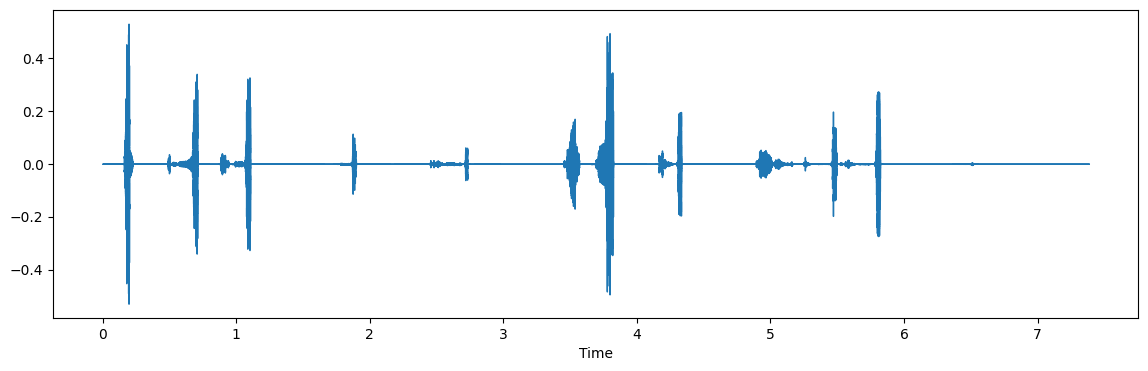

In [51]:
delaycatizotope_diff = numpy.asarray([delaycat[i] - izotope[i] for i in range(len(delaycat))])
display(ipd.Audio(delaycatizotope_diff, rate=sr))

plt.figure(figsize=(14, 4))
librosa.display.waveshow(delaycatizotope_diff, sr=sr)